**Ecuaciones de Lotka-Volterra**


* Alan Alberto Mota Yescas  -  A01753924
* Daniela Pamelin Alvarez Guarneros - A01026164
* Diego Arturo González Juarez - A01747987 
* Sebastian Jimenez Alcantara - A01754993
* Hendrik Steven Arias López - A01378065

Lo que se busca realizar esta tercera fase es encontrar una solución estocástica de las ecuaciones de Lotka-Volterra. 

El modelo matemático que se utlizara es una cadena de Markov continua. Es decir es una serie de eventos, donde la probabilidad de que ocurra el próximo evento depende del evento inmediato anterior, cada evento realizado tiene variables, condiciones y datos que ayuda al resultado del próximo evento.

Ahora bien si se considera un ecosistema donde hay presas (presas, P) y depredadores (D). La descripción de la dinámica del sistema se puede hacer a través de los posibles procesos:

* P → 2P
* P+D →2D
* D → 0

El primero de ellos representa el crecimiento de las presas, el segundo el crecimiento de los depredadores como consecuencia de comer las presas y el tercero la muerte de los depredadores por razones naturales.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Proceso a) (depredadores y presas)

In [ ]:
tiempo_lim = 30 ##límite de tiempo
presas = []  #array para evolución temporal número de presas
depred = [] #array para evolución temporal número de depredadores
pp =50.0  #número inicial de presas
dd =100.0 #número inicial de depredadores

##constantes para calcular los rates
c1=1.0
c2=0.005
c3=0.6
currTime=0 #tiempo actual
while (currTime < tiempo_lim):
  if ((pp and dd) > 0):
    rate1 = c1*pp
    rate2 = c2*pp*dd
    rate3 = c3*dd
    rate = rate1 + rate2 + rate3
    currTime += np.random.exponential(1/rate)
    prob = np.random.multinomial(1,[rate1/rate, rate2/rate, rate3/rate])
    if (prob[0] == 1):
      pp += 1
    elif (prob[1] == 1):
      pp -= prob[1]
      dd += prob[1]
    else: 
      dd -= prob[2]
    presas.append(pp)
    depred.append(dd)
  elif(pp > 0) and (dd == 0):
    rate1 = c1*pp
    currTime += np.random.exponential(1/rate1)
    pp += 1
    presas.append(pp)
  elif(pp == 0) and (dd > 0):
    rate3 = c3*dd
    currTime += np.random.exponential(1/rate3)
    dd -= 1
    depred.append(dd)
  else:
    currTime = tiempo_lim
if (len(presas) == 0):
  print("0", depred[-1], currTime)
elif (len(depred) == 0):
  print(presas[-1],"0",currTime)
else:
  print(presas[-1], depred[-1], currTime)

83.0 301.0 30.00226693359303


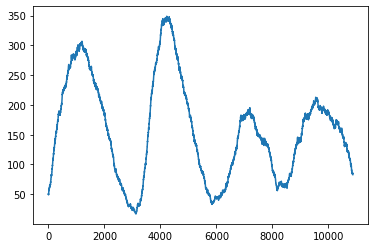

In [ ]:
plt.plot(presas)

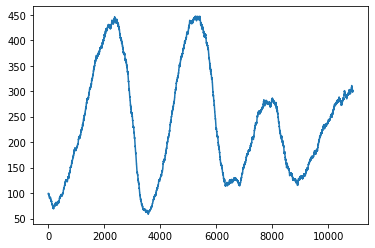

In [ ]:
plt.plot(depred)

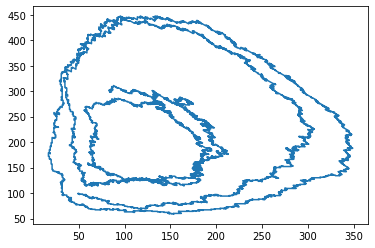

In [ ]:
if (len(presas) == 0):
  print("No hay presas")
elif(len(depred) == 0):
  print("No hay depredadores")
else:
  plt.plot(presas, depred)